In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
df_team = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv")
df_team_regularc = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MRegularSeasonCompactResults.csv")
df_team_detailedc = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MNCAATourneyDetailedResults.csv")
df_team_regular_sea = pd.read_csv("/Users/rodoshikhan/Desktop/TKH Phase 2/TEP /march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv")

In [4]:
df_team.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [5]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2451 non-null   int64 
 1   DayNum   2451 non-null   int64 
 2   WTeamID  2451 non-null   int64 
 3   WScore   2451 non-null   int64 
 4   LTeamID  2451 non-null   int64 
 5   LScore   2451 non-null   int64 
 6   WLoc     2451 non-null   object
 7   NumOT    2451 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 153.3+ KB


In [6]:
df_team.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [7]:
df_team.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,136,1116,63,1234,54
1,1985,136,1120,59,1345,58
2,1985,136,1207,68,1250,43
3,1985,136,1229,58,1425,55
4,1985,136,1242,49,1325,38


In [8]:
df_team.drop(['DayNum'], axis=1, inplace=True)

In [9]:
df_team.head()

,Season,WTeamID,WScore,LTeamID,LScore
0,1985,1116,63,1234,54
1,1985,1120,59,1345,58
2,1985,1207,68,1250,43
3,1985,1229,58,1425,55
4,1985,1242,49,1325,38


In [10]:
df_team['WScore'].head()

0    63
1    59
2    68
3    58
4    49
Name: WScore, dtype: int64

In [11]:
df_team.describe()

,Season,WTeamID,WScore,LTeamID,LScore
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,2003.837617,1285.964096,76.789066,1291.720522,65.070175
std,11.127010,100.914469,11.769728,103.358097,11.010235
min,1985.000000,1101.000000,43.000000,1101.000000,29.000000
25%,1994.000000,1210.000000,69.000000,1209.500000,58.000000
50%,2004.000000,1276.000000,76.000000,1287.000000,64.000000
75%,2013.000000,1385.000000,84.000000,1387.000000,72.000000
max,2023.000000,1463.000000,149.000000,1463.000000,115.000000


In [12]:
df_team.isnull().sum()

Season     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
dtype: int64

In [22]:
df_team_detailedc['WFGM3'].head()

0    11
1     7
2     6
3     3
4     7
Name: WFGM3, dtype: int64

In [23]:
df_team_detailedc['WFGA'].head()

0    69
1    66
2    59
3    53
4    64
Name: WFGA, dtype: int64

In [24]:
df_team_detailedc['WTO'].head()

0    12
1    16
2     9
3    18
4    13
Name: WTO, dtype: int64

In [17]:
df_team_regularc.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [16]:
df_team_detailedc.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [15]:
df_team_detailedc.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [14]:
df_total = pd.concat([df_team, df_team_regularc, df_team_detailedc, df_team_regular_sea])

In [25]:
df_total['WScore'] = df_total['WScore'].fillna(0)
df_total['LScore'] = df_total['LScore'].fillna(0)
df_total['WTeamID'] = df_total['WTeamID'].fillna(0)
df_total['LTeamID'] = df_total['LTeamID'].fillna(0)
df_total['WLoc'] = df_total['WLoc'].fillna(0)
df_total['DayNum'] = df_total['DayNum'].fillna(0)
df_total['Season'] = df_total['Season'].fillna(0)

In [26]:
df_total.head()

,Season,WTeamID,WScore,LTeamID,LScore,DayNum,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1985,1116,63,1234,54,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,1120,59,1345,58,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985,1207,68,1250,43,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,1229,58,1425,55,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,1242,49,1325,38,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304296 entries, 0 to 113240
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Season   304296 non-null  int64  
 1   WTeamID  304296 non-null  int64  
 2   WScore   304296 non-null  int64  
 3   LTeamID  304296 non-null  int64  
 4   LScore   304296 non-null  int64  
 5   DayNum   304296 non-null  float64
 6   WLoc     304296 non-null  object 
 7   NumOT    301845 non-null  float64
 8   WFGM     114556 non-null  float64
 9   WFGA     114556 non-null  float64
 10  WFGM3    114556 non-null  float64
 11  WFGA3    114556 non-null  float64
 12  WFTM     114556 non-null  float64
 13  WFTA     114556 non-null  float64
 14  WOR      114556 non-null  float64
 15  WDR      114556 non-null  float64
 16  WAst     114556 non-null  float64
 17  WTO      114556 non-null  float64
 18  WStl     114556 non-null  float64
 19  WBlk     114556 non-null  float64
 20  WPF      114556 non-null  float

In [28]:
df_total.describe()

,Season,WTeamID,WScore,LTeamID,LScore,DayNum,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,304296.000000,304296.000000,304296.000000,304296.000000,304296.000000,304296.000000,301845.000000,114556.000000,114556.000000,114556.000000,...,114556.000000,114556.0000,114556.000000,114556.000000,114556.000000,114556.000000,114556.000000,114556.000000,114556.000000,114556.000000
mean,2008.772172,1287.719645,76.405227,1283.125299,64.374632,72.571375,0.056194,26.350257,55.676595,7.303616,...,20.063026,12.0562,17.722258,10.540382,21.659189,11.401061,13.943879,5.991768,2.868719,18.928864
std,10.503546,104.946524,11.553347,104.828896,11.084713,35.469502,0.276944,4.680820,7.462081,3.107256,...,6.042290,5.3388,7.081925,4.226749,4.521915,3.721783,4.383599,2.745770,2.021392,5.365590
min,1985.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.0000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,1199.000000,69.000000,1191.000000,57.000000,42.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.0000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2010.000000,1285.000000,76.000000,1281.000000,64.000000,75.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.0000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2017.000000,1380.000000,84.000000,1375.000000,71.000000,103.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.0000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2024.000000,1478.000000,186.000000,1478.000000,150.000000,154.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,42.0000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


Univariate Analysis

<Axes: xlabel='WScore', ylabel='Count'>

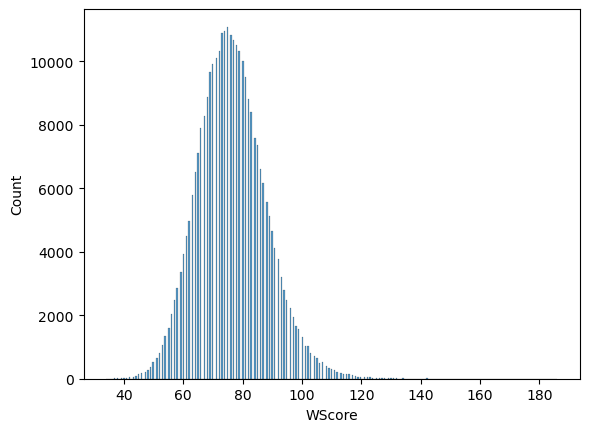

In [29]:
# see the scatterplot for the number of wins (overall)
sns.histplot(data=df_total, x = 'WScore')

<Axes: xlabel='LScore', ylabel='Count'>

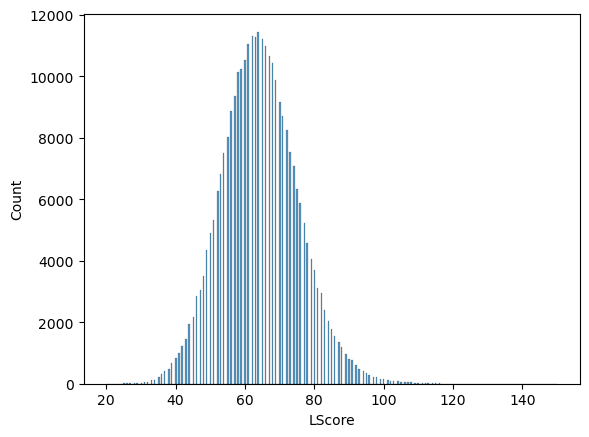

In [30]:
# see the scatterplot for the number of losses (overall)
sns.histplot(data=df_total, x= 'LScore')

<Axes: xlabel='WFGM', ylabel='Count'>

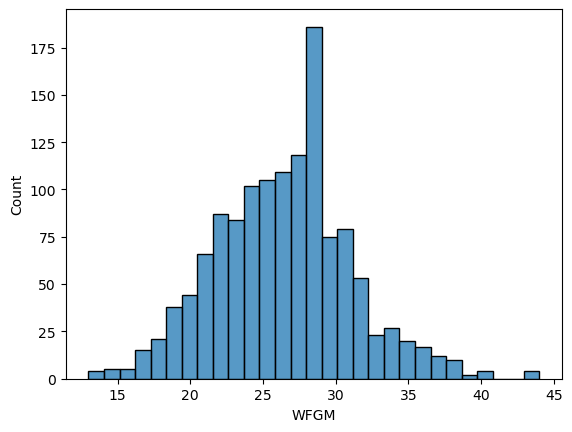

In [ ]:
# graphing a histplot for "WFGM"
sns.histplot(data=df_team_detailedc, x= 'WFGM')

<Axes: xlabel='LFGM', ylabel='Count'>

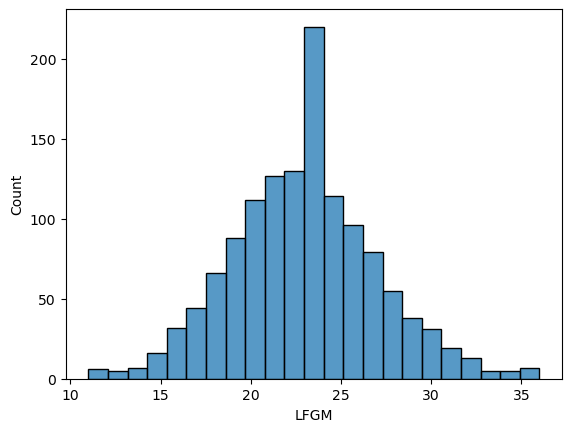

In [ ]:
# graphing a histplot for "LFGM"
sns.histplot(data=df_team_detailedc, x= 'LFGM')

<Axes: xlabel='WFGA', ylabel='Count'>

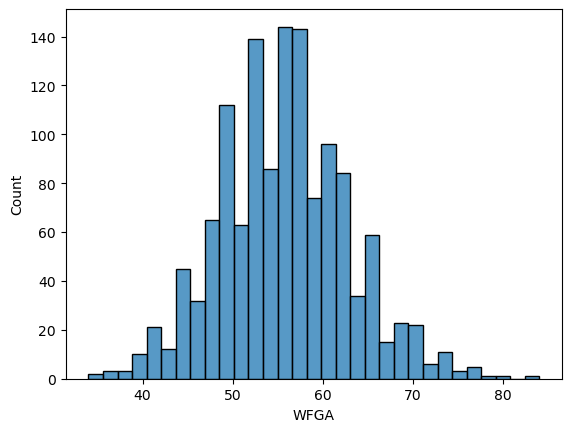

In [ ]:
# graphing a histplot for "WFGA"
sns.histplot(data=df_team_detailedc, x= 'WFGA')

<Axes: xlabel='WFGM3', ylabel='Count'>

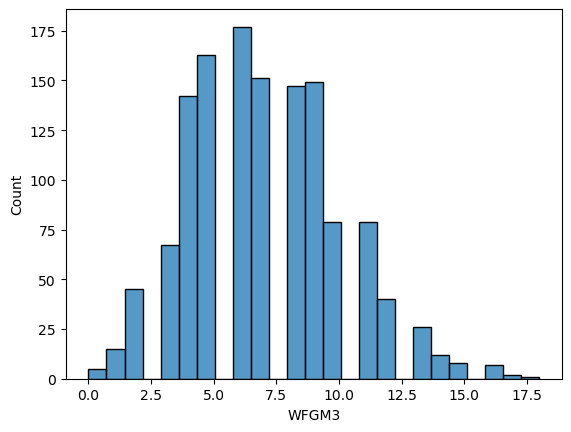

In [ ]:
# graphing a histplot for "WFGM3"
sns.histplot(data=df_team_detailedc, x= 'WFGM3')

<Axes: xlabel='LFGM3', ylabel='Count'>

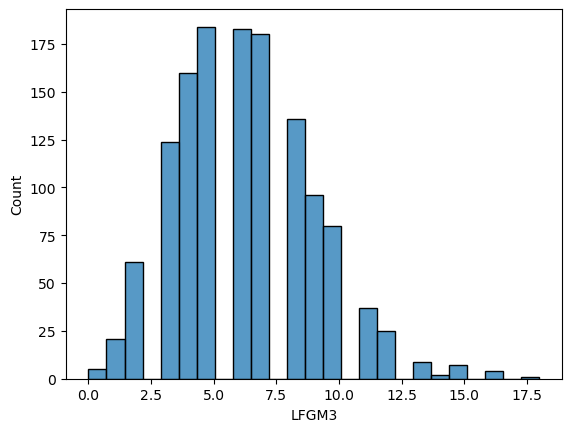

In [ ]:
# graphing a histplot for "LFGM3"
sns.histplot(data=df_team_detailedc, x= 'LFGM3')

<Axes: xlabel='WFGA3', ylabel='Count'>

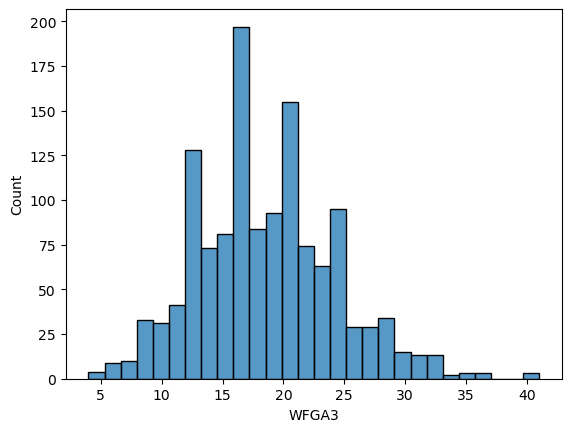

In [ ]:
# graphing a histplot for "WFGA3"
sns.histplot(data=df_team_detailedc, x= 'WFGA3')

<Axes: xlabel='WFTM', ylabel='Count'>

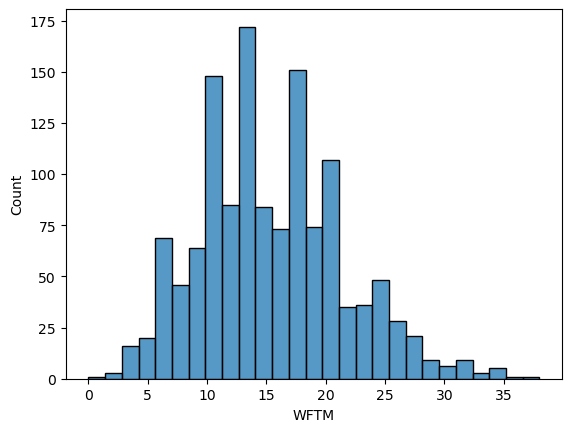

In [ ]:
# graphing a histplot for "WFTM"
sns.histplot(data=df_team_detailedc, x= 'WFTM')

<Axes: xlabel='LFGA3', ylabel='Count'>

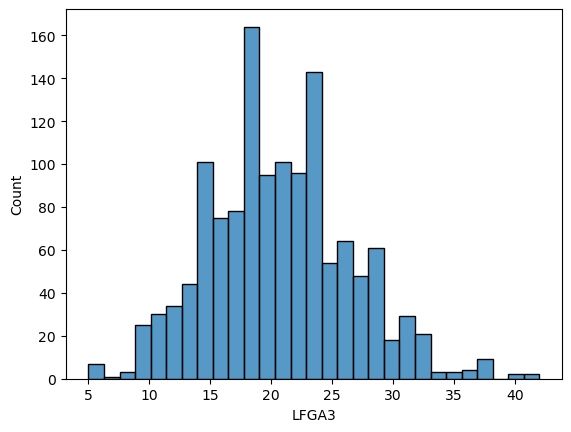

In [ ]:
# graphing a histplot for "LFGA3"
sns.histplot(data=df_team_detailedc, x= 'LFGA3')

<Axes: xlabel='LFGA3', ylabel='Count'>

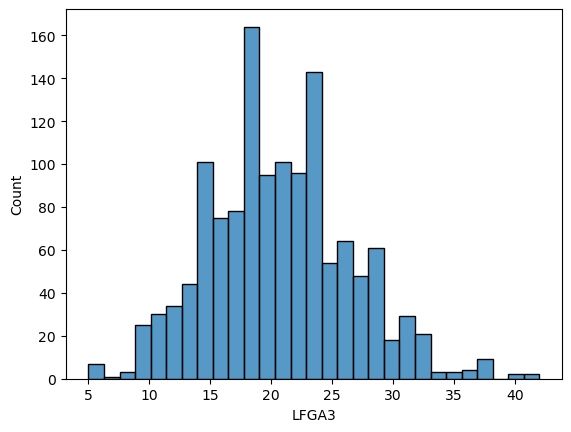

In [ ]:
# graphing a histplot for "LFGA3"
sns.histplot(data=df_team_detailedc, x= 'LFGA3')

<Axes: xlabel='WFTA', ylabel='Count'>

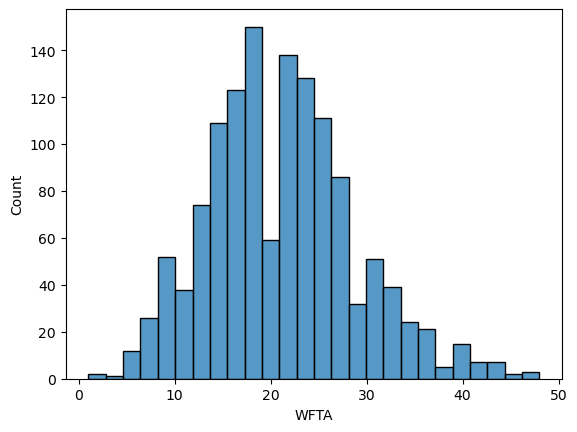

In [ ]:
# graphing a histplot for "WFTA"
sns.histplot(data=df_team_detailedc, x= 'WFTA')

<Axes: xlabel='WFTA', ylabel='Count'>

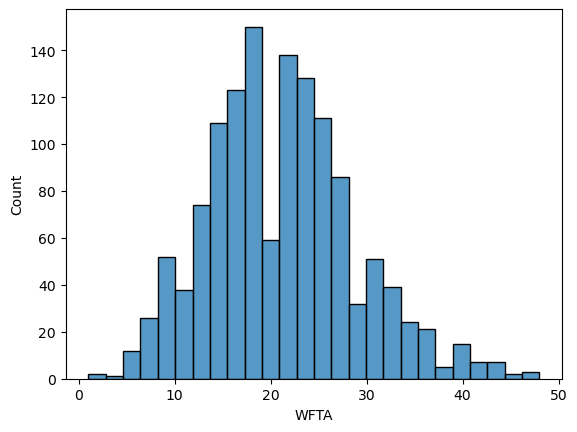

In [ ]:
# graphing a histplot for "WFTA"
sns.histplot(data=df_team_detailedc, x= 'WFTA')

<Axes: xlabel='LFTA', ylabel='Count'>

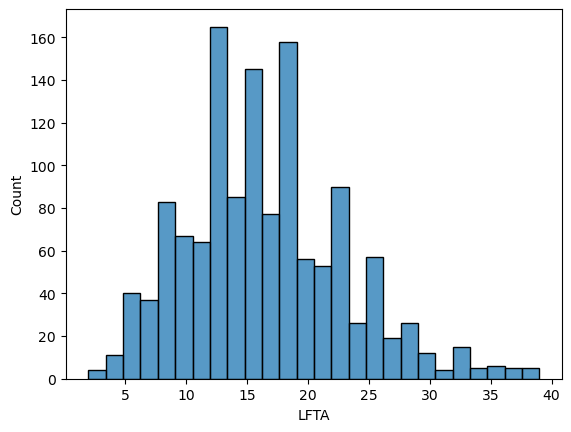

In [ ]:
# graphing a histplot for "LFTA"
sns.histplot(data=df_team_detailedc, x= 'LFTA')

<Axes: xlabel='WOR', ylabel='Count'>

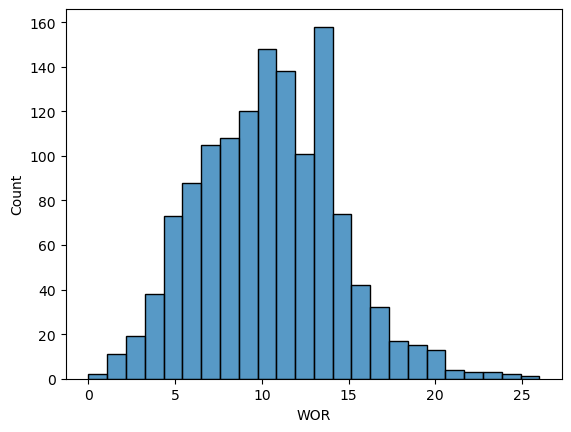

In [ ]:
# graphing a histplot for "WOR"
sns.histplot(data=df_team_detailedc, x= 'WOR')

<Axes: xlabel='LOR', ylabel='Count'>

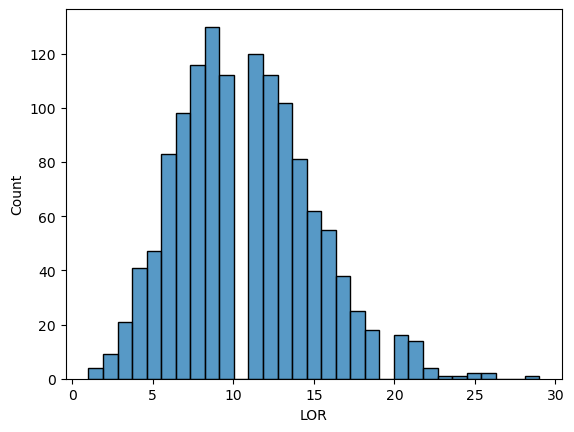

In [ ]:
# graphing a histplot for "LOR"
sns.histplot(data=df_team_detailedc, x= 'LOR')

<Axes: xlabel='WDR', ylabel='Count'>

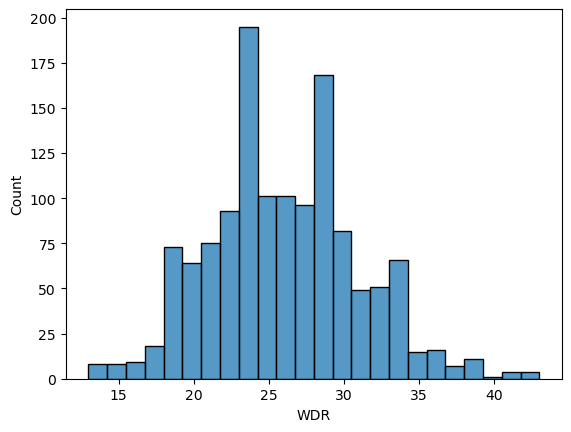

In [ ]:
# graphing a histplot for "WDR"
sns.histplot(data=df_team_detailedc, x= 'WDR')

<Axes: xlabel='LDR', ylabel='Count'>

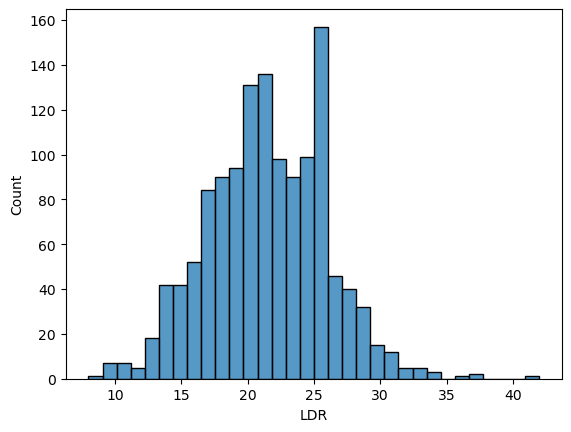

In [ ]:
# graphing a histplot for "LDR"
sns.histplot(data=df_team_detailedc, x= 'LDR')

<Axes: xlabel='WAst', ylabel='Count'>

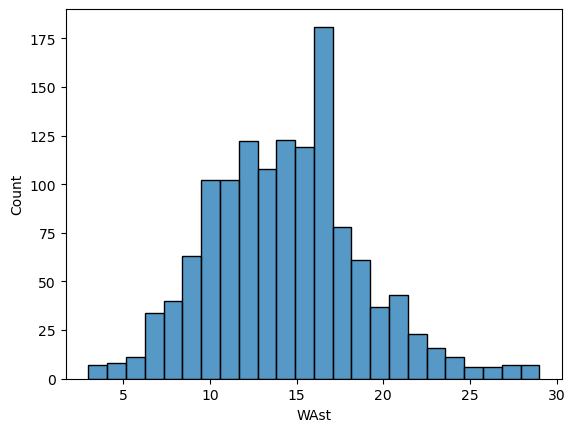

In [ ]:
# graphing a histplot for "WAst"
sns.histplot(data=df_team_detailedc, x= 'WAst')

<Axes: xlabel='LAst', ylabel='Count'>

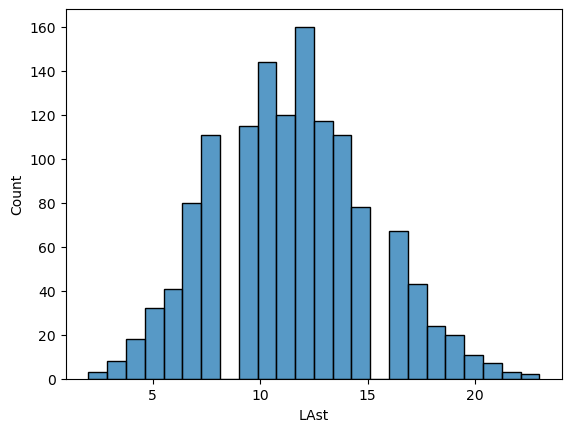

In [ ]:
# graphing a histplot for "LAst"
sns.histplot(data=df_team_detailedc, x= 'LAst')

<Axes: xlabel='WTO', ylabel='Count'>

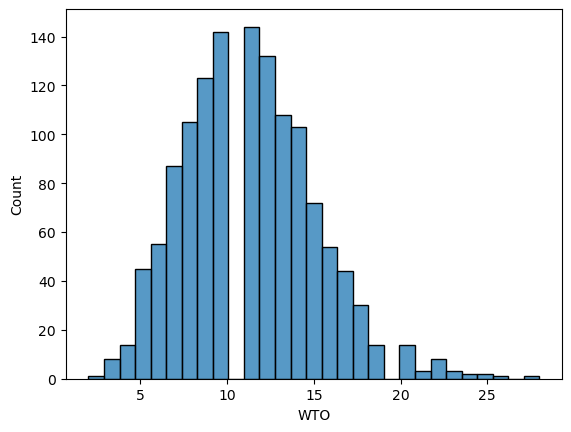

In [ ]:
# graphing a histplot for "WTO"
sns.histplot(data=df_team_detailedc, x= 'WTO')

<Axes: xlabel='LTO', ylabel='Count'>

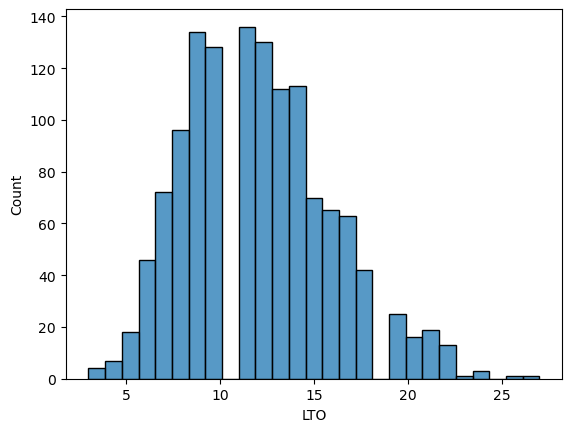

In [ ]:
# graphing a histplot for "LTO"
sns.histplot(data=df_team_detailedc, x= 'LTO')

<Axes: xlabel='WStl', ylabel='Count'>

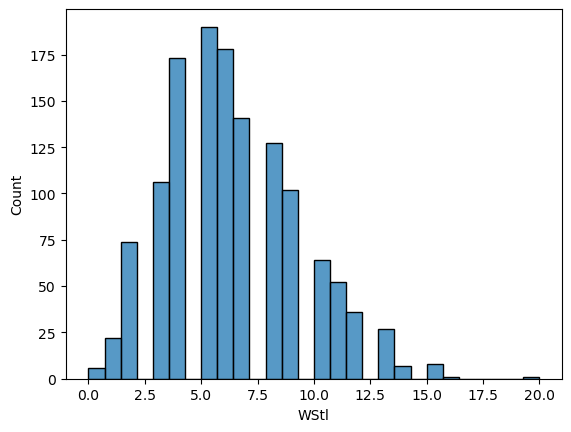

In [ ]:
# graphing a histplot for "WStl"
sns.histplot(data=df_team_detailedc, x= 'WStl')

<Axes: xlabel='LStl', ylabel='Count'>

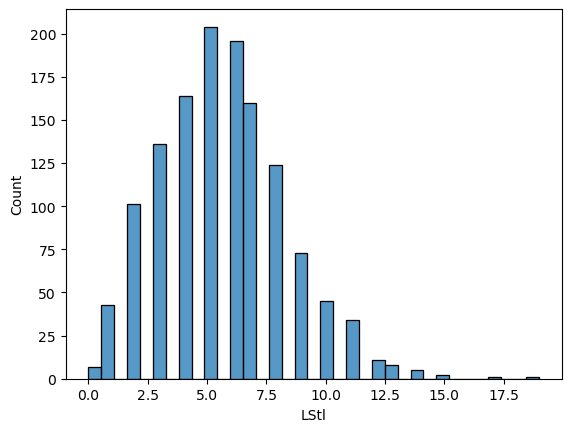

In [ ]:
# graphing a histplot for "LStl"
sns.histplot(data=df_team_detailedc, x= 'LStl')

<Axes: xlabel='WBlk', ylabel='Count'>

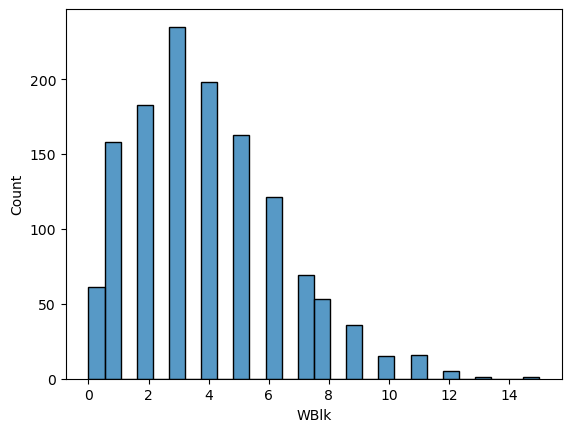

In [ ]:
# graphing a histplot for "WBlk"
sns.histplot(data=df_team_detailedc, x= 'WBlk')

<Axes: xlabel='LBlk', ylabel='Count'>

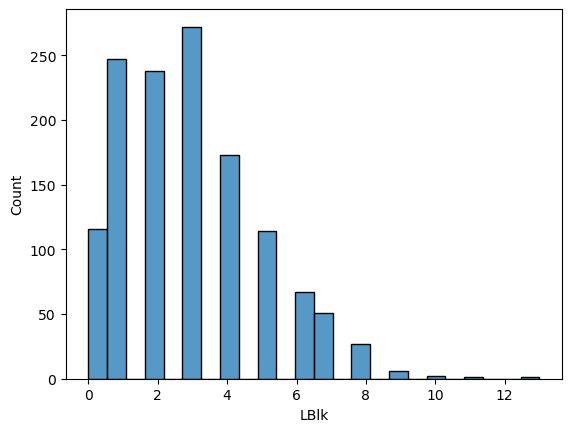

In [ ]:
# graphing a histplot for "LBlk"
sns.histplot(data=df_team_detailedc, x= 'LBlk')

<Axes: xlabel='WPF', ylabel='Count'>

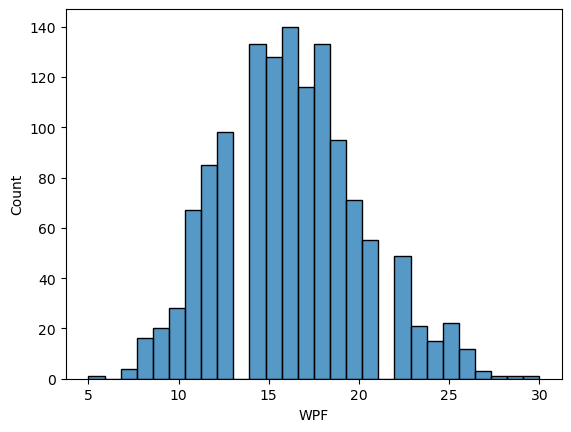

In [ ]:
# graphing a histplot for "WPF"
sns.histplot(data=df_team_detailedc, x= 'WPF')

<Axes: xlabel='LPF', ylabel='Count'>

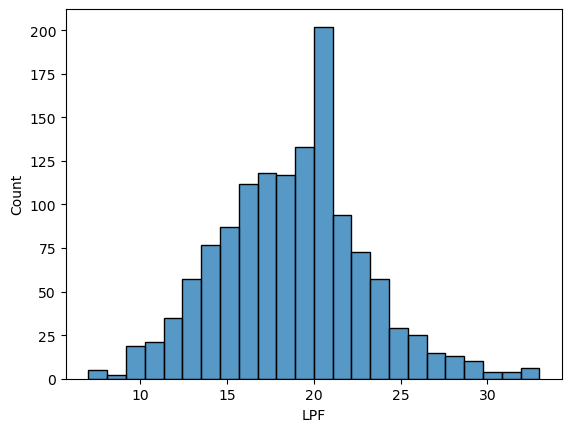

In [ ]:
# graphing a histplot for "LPF"
sns.histplot(data=df_team_detailedc, x= 'LPF')

<Axes: xlabel='LFGM', ylabel='WFGM'>

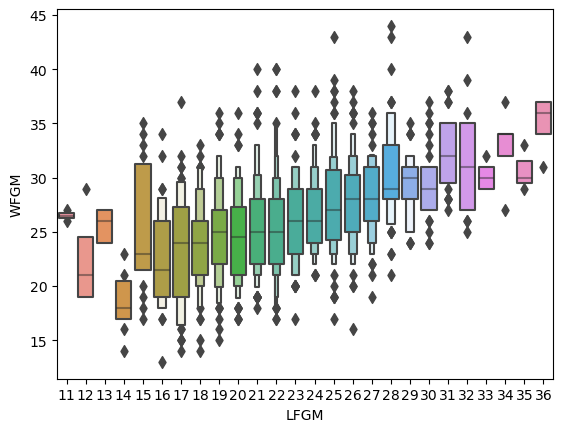

In [ ]:
# graphing a boxexplot between columns "WFGM" and "LFGM"
sns.boxenplot(data=df_team_detailedc, y='WFGM', x ='LFGM')

/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/1762986923.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_1194/176298

ValueError: num must be an integer with 1 <= num <= 9, not 10

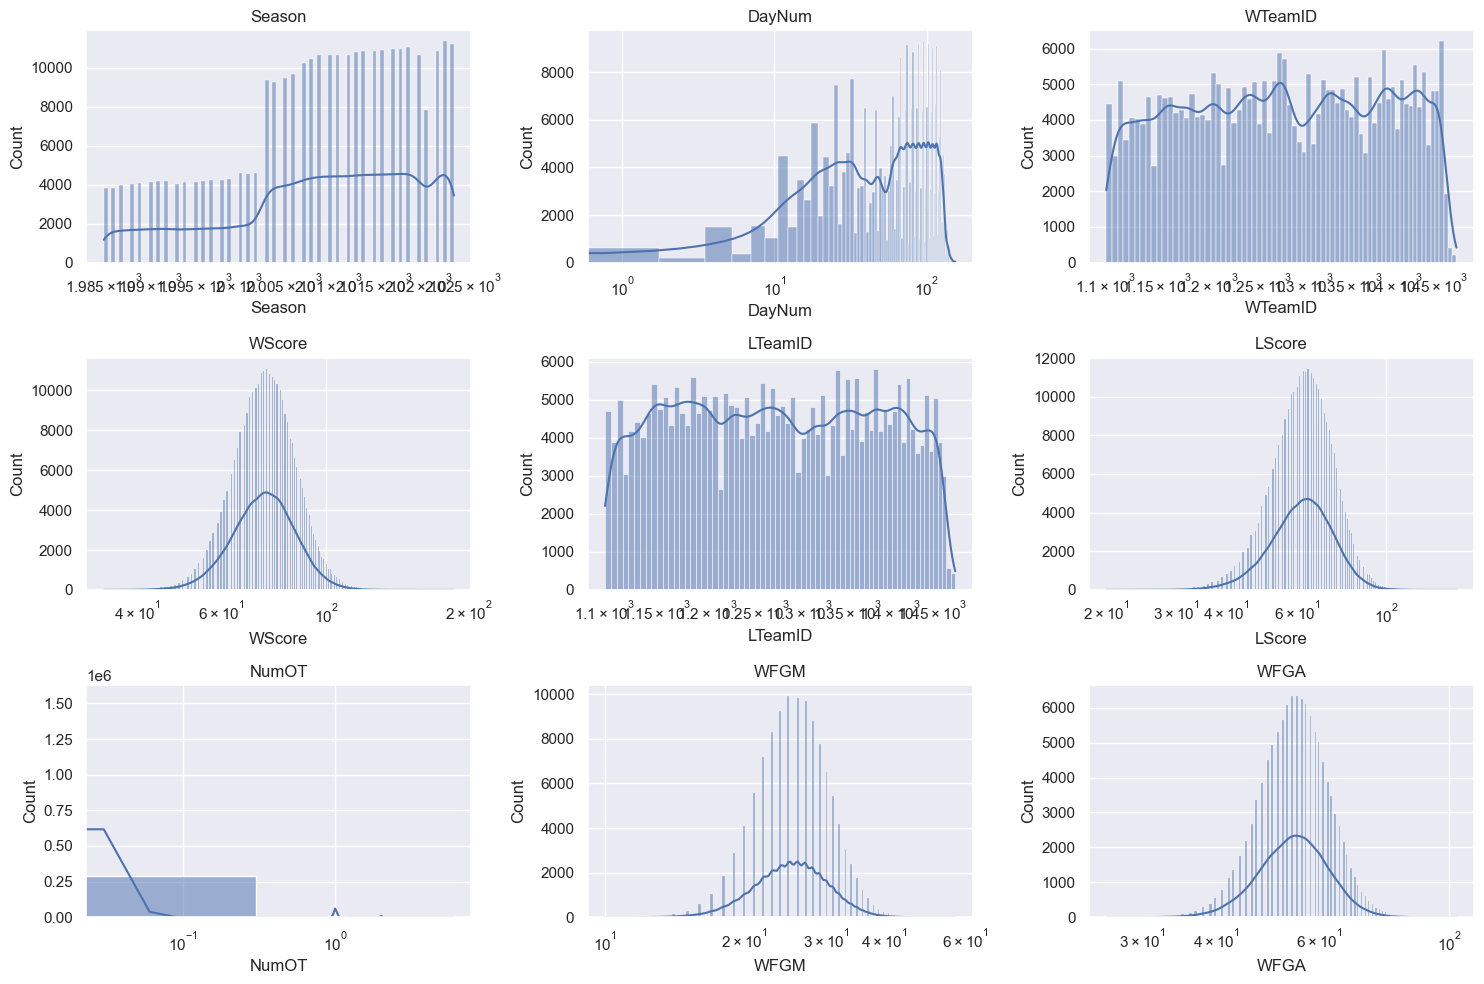

In [ ]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_total[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

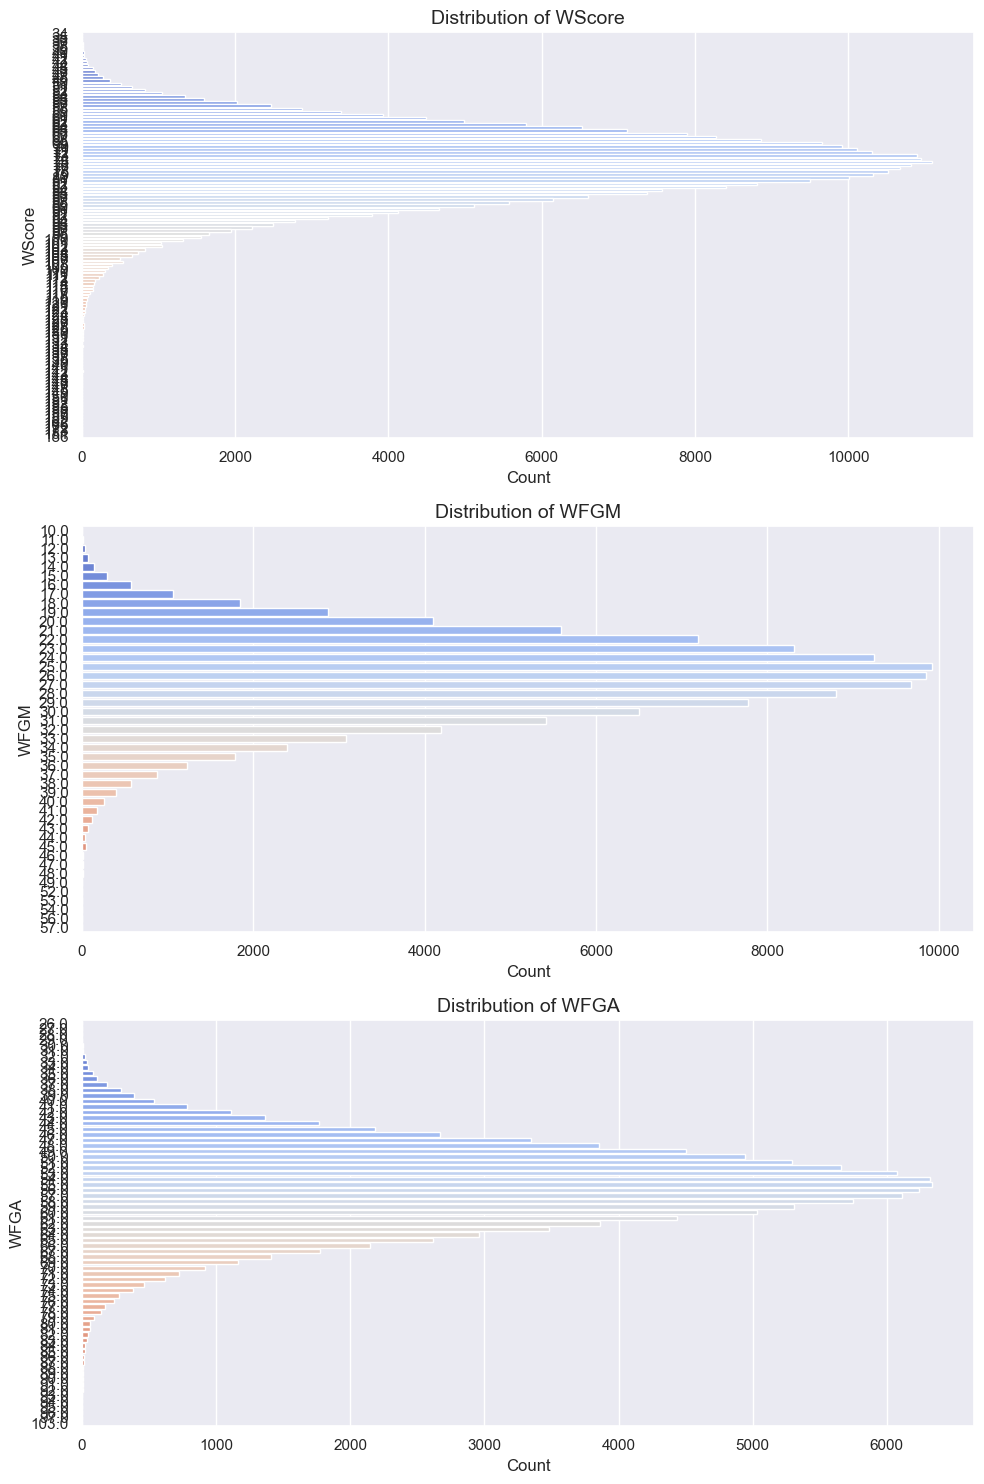

In [ ]:
# Univariate Analysis: Categorical variables
categorical_columns = ['WScore', 'WFGM', 'WFGA']

# Plotting distributions of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(y=df_total[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


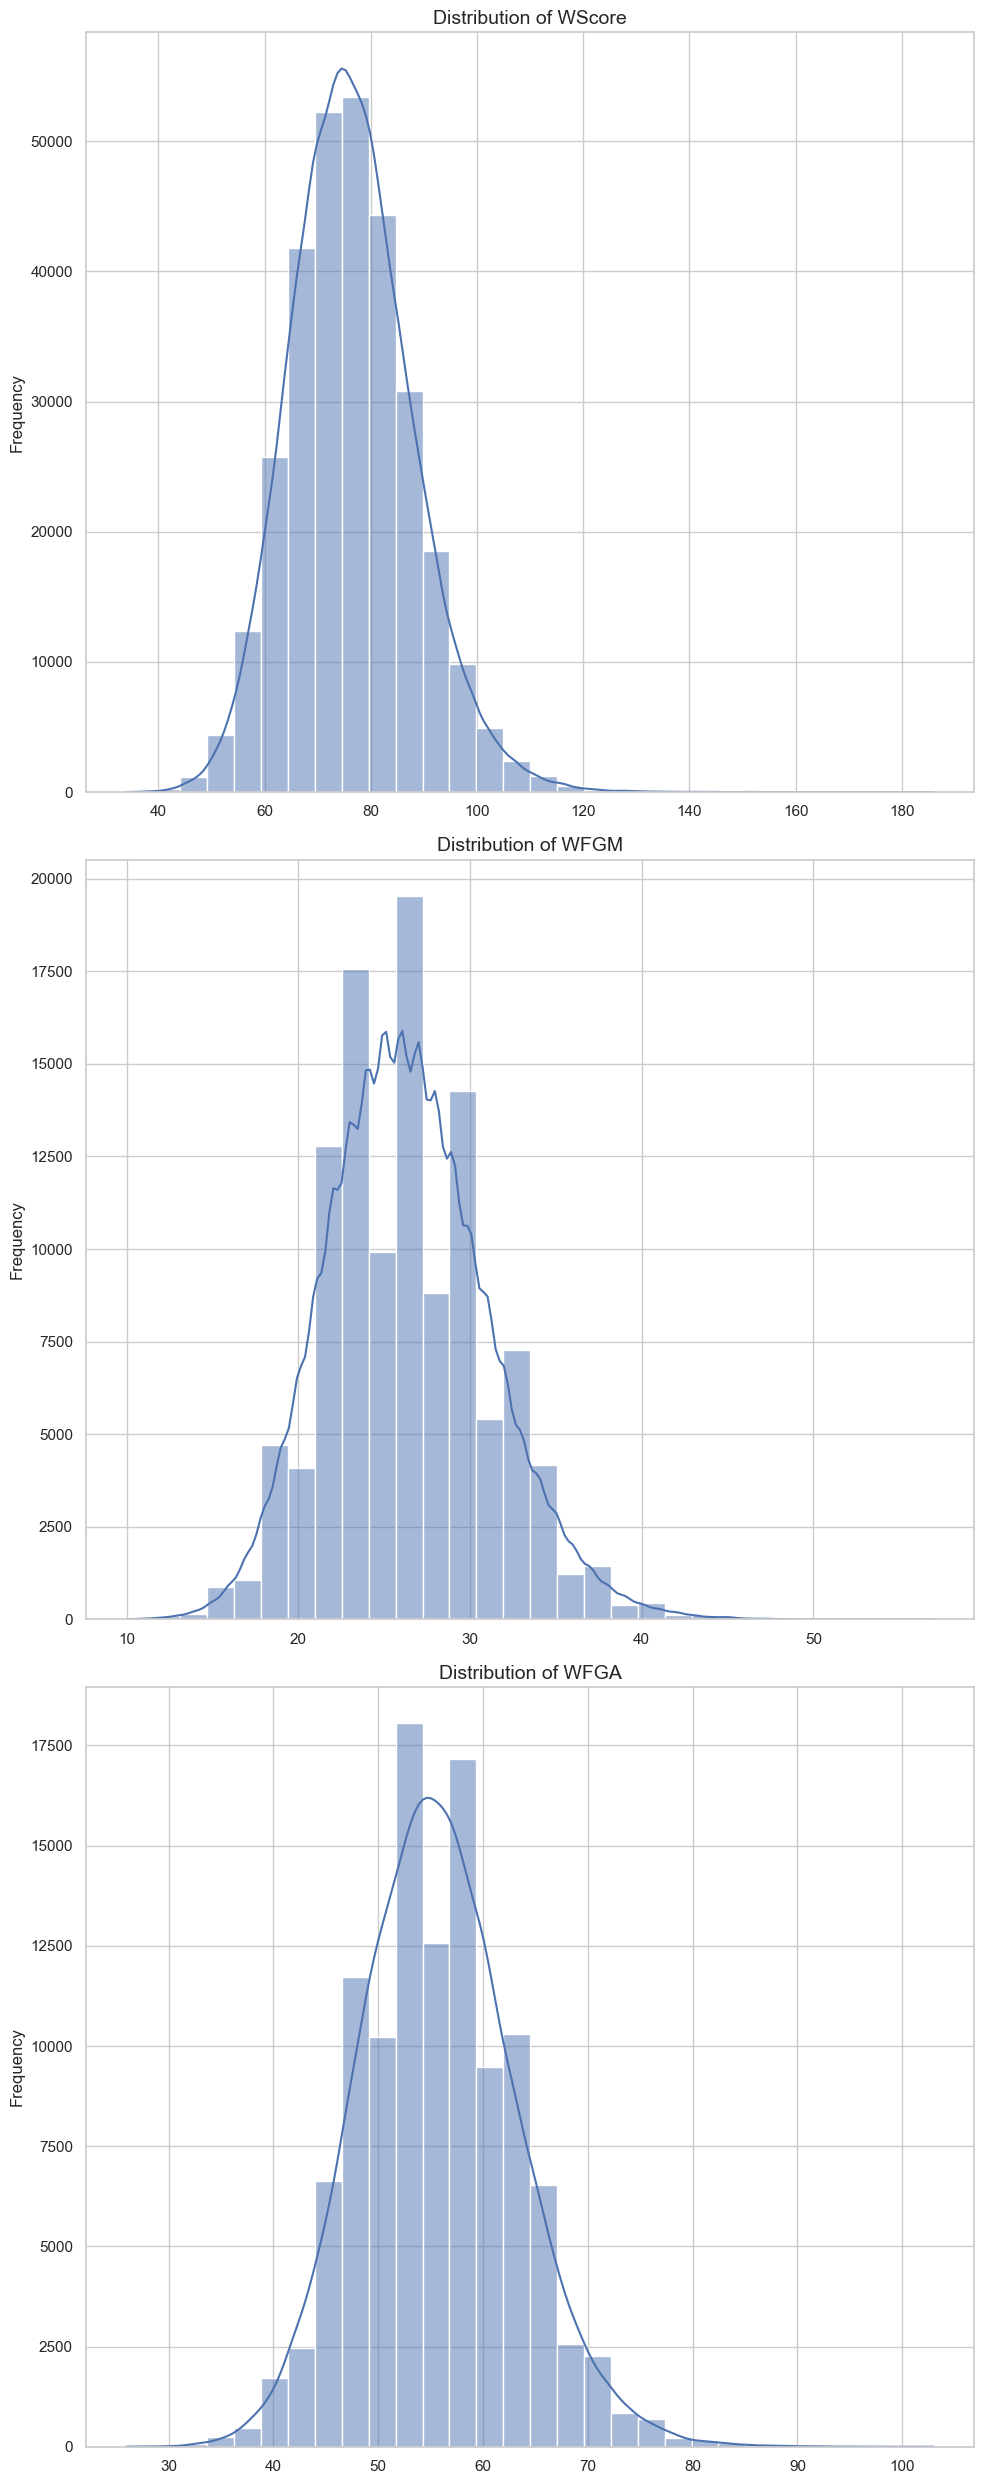

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
sns.set(style="whitegrid")

# Univariate Analysis: Numeric variables
numeric_columns = ['WScore', 'WFGM', 'WFGA']

# Plotting distributions of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 25))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_total[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


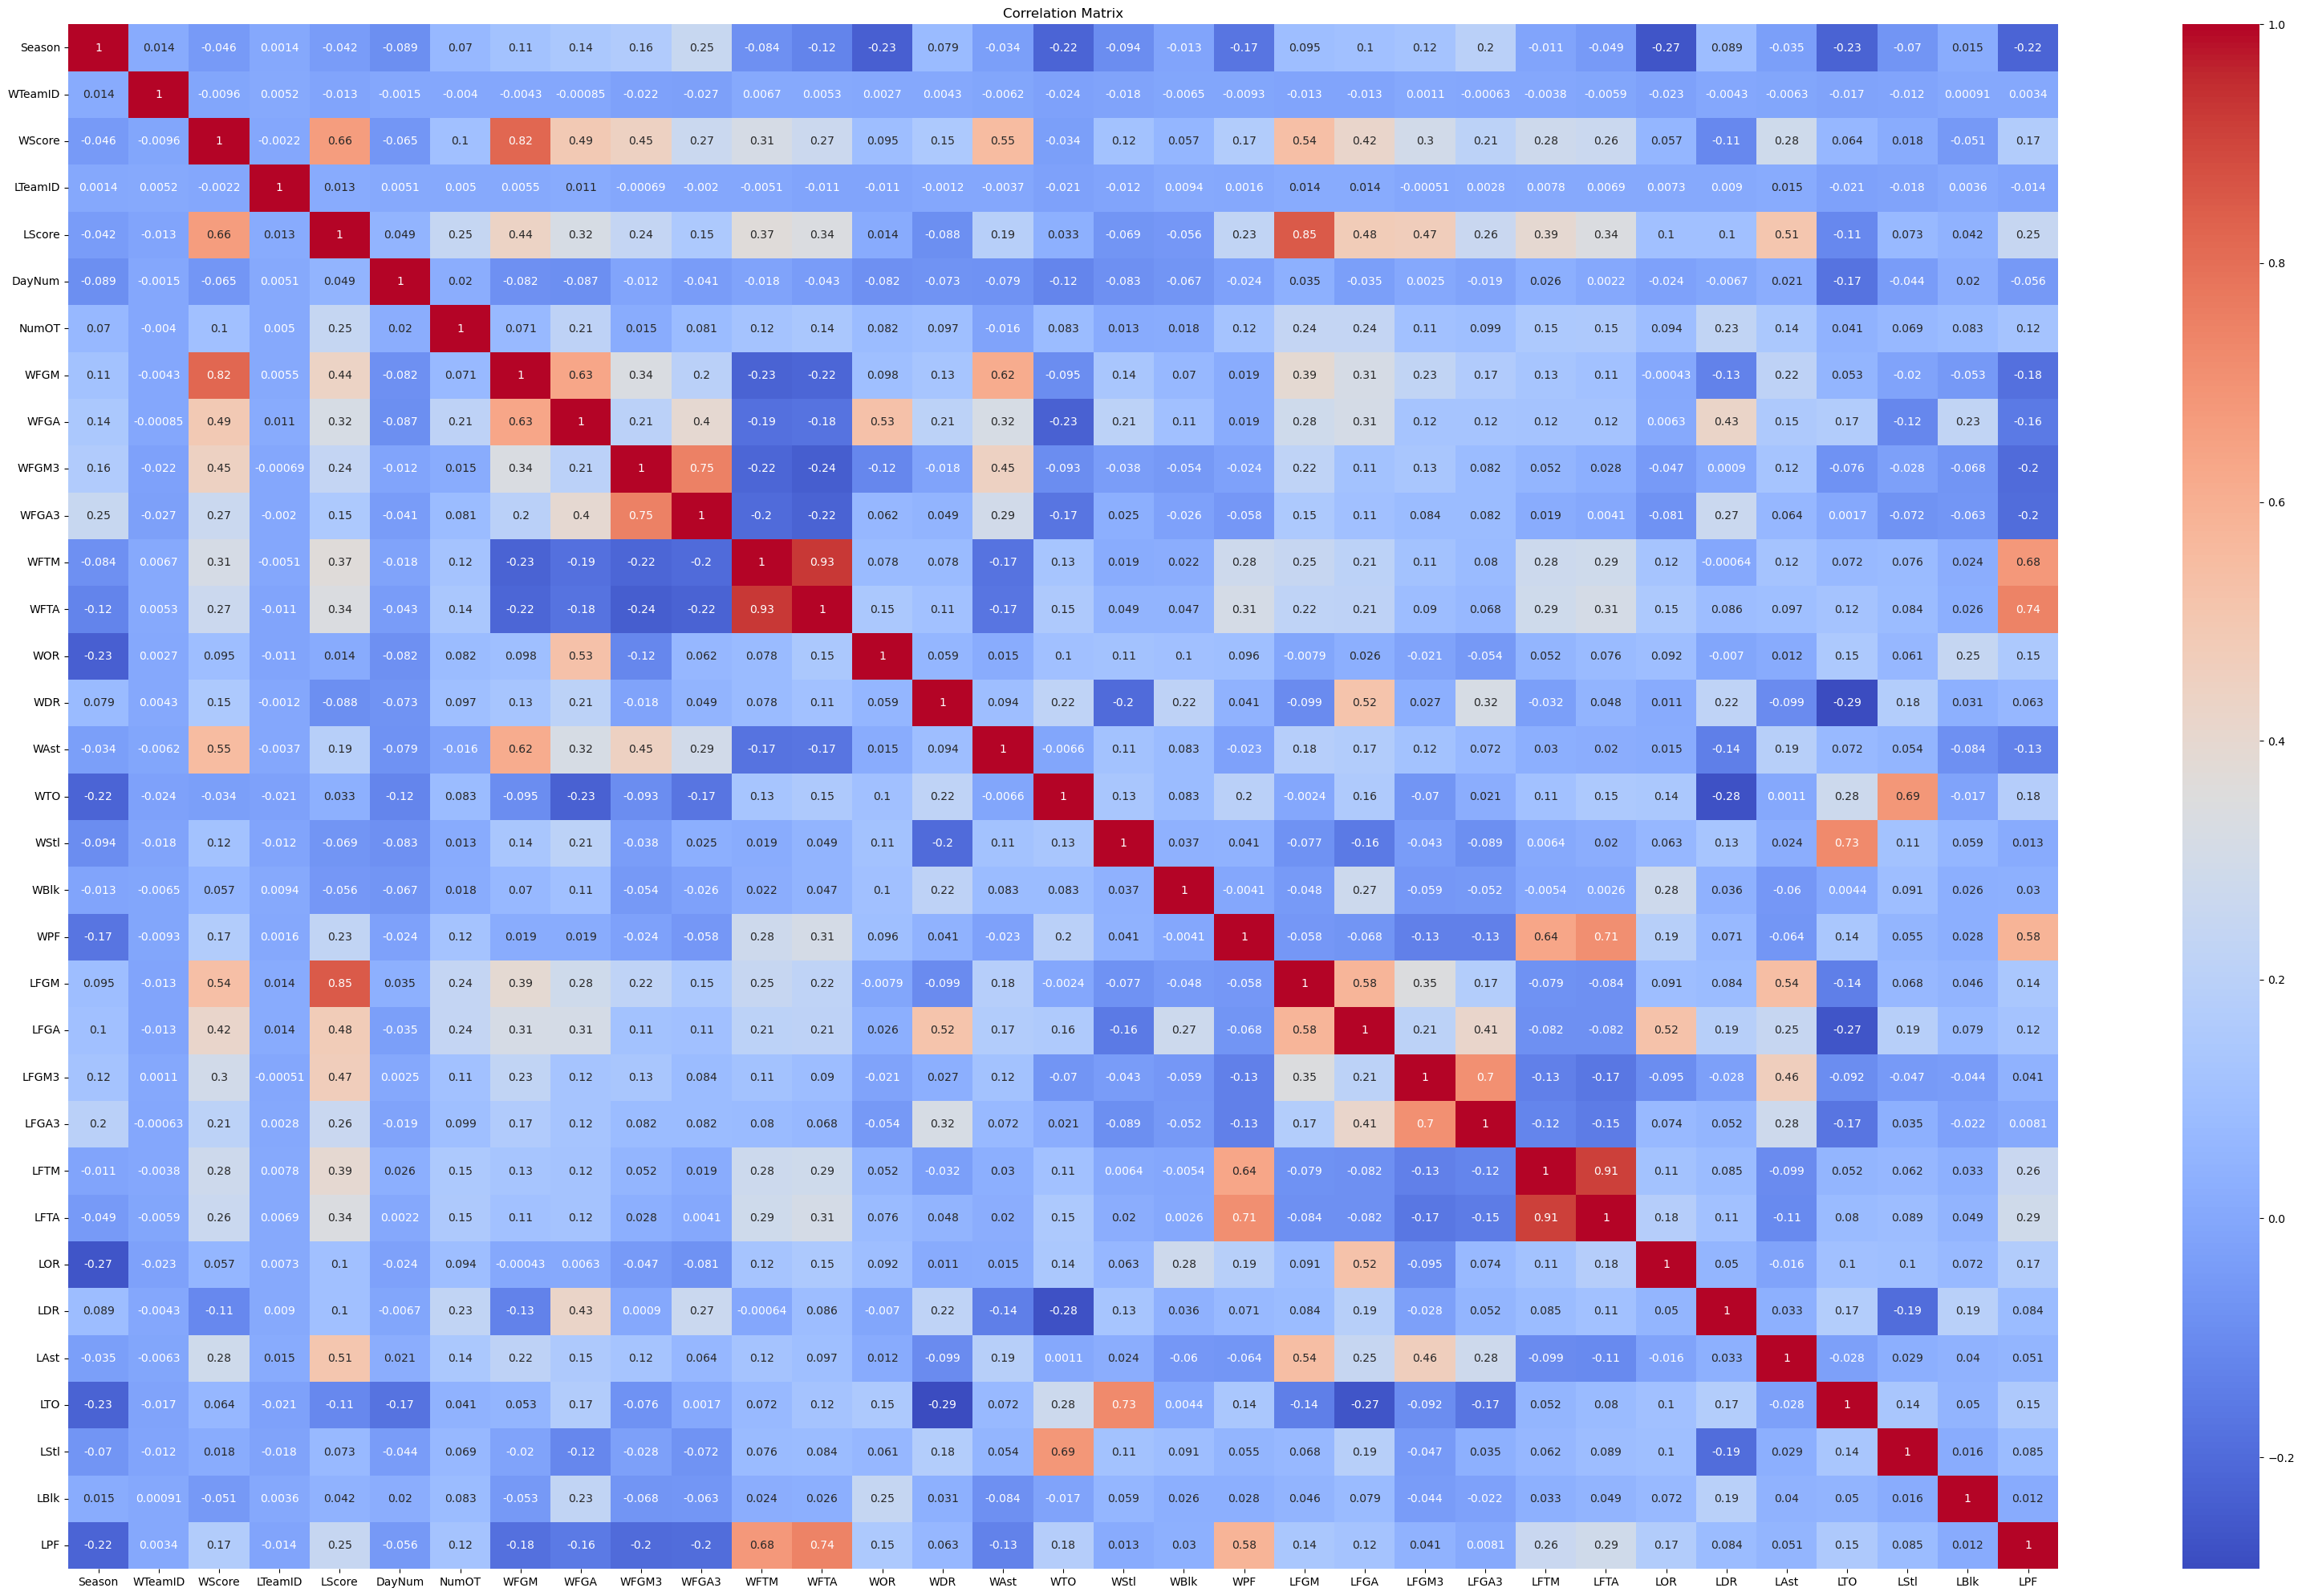

In [31]:
# Correlation Matrix
correlation_matrix = df_total.corr(numeric_only=True)

plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# save newly transformed dataframe into a csv file
df_total.to_csv('df_total.csv')